<a href="https://colab.research.google.com/github/SouhailChatti/Fraud_Detection/blob/master/M%C3%A9moire_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction :**

Notre objectif dans ce projet est de construire des modèles pour prédire si une transaction par carte de crédit est frauduleuse. Nous tenterons une approche d'apprentissage supervisé. Nous créerons également des visualisations pour nous aider à comprendre la structure des données et à mettre au jour tout modèle intéressant.

***Importer des bibliothèques de base :***

In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')


# Librairie Google Colab
from google.colab import drive

In [0]:
# Monte votre Google Drive sur le serveur.
drive.mount("/content/MyDrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive/


# **Read Data** 

In [0]:
Df = pd.read_csv('/content/MyDrive/My Drive/creditcard.csv')
print(Df.shape)
Df.head(50)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


* Notre dataset est un ensemble de données sur les transactions par carte de crédit effectuées sur une période de 2 jours en Septembre 2013 par les détenteurs de cartes européens
* Chaque transaction comporte 30 caractéristiques, toutes numériques.
* Les caractéristiques V1, V2, ..., V28 sont le résultat d'une transformation ACP (pour protéger la confidentialités, les informations de base sur ces caractéristiques ne sont pas disponibles).
* La caractéristique Temps contient le temps écoulé depuis la première transaction
* La caractéristique Montant contient le montant de la transaction. 
* La variable de réponse, Classe, est égale à 1 dans le cas d'une fraude, et à 0 dans les autres cas.

# ***Exploratory Data Analysis***

In [0]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [0]:
Df.isnull().any().any()
#Nous n'avons pas des variables pour lesquelles il manque des données 

False

In [0]:
# On va voir la répartition de notre labels(classe), càd la fréquence des transactions frauduleuses et des transactions non frauduleuses
class_names = {0:'Not Fraud', 1:'Fraud'}
print(Df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [0]:
# Les classes sont fortement déséquilibrées, nous devons résoudre ce problème plus tard.
print('No Frauds', round(Df['Class'].value_counts()[0]/len(Df) * 100,2), '% of the dataset')
print('Frauds', round(Df['Class'].value_counts()[1]/len(Df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Seulement 0,17 % (492 sur 284 807) des transactions sont frauduleuses ==> on a désequilibre sur les données.**

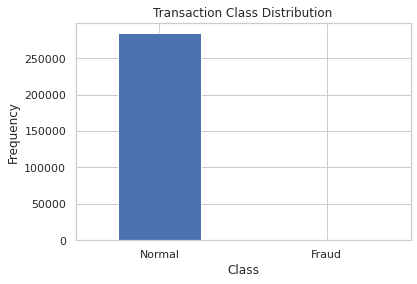

In [0]:
# Vérifions maintenant la répartition des classes
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(Df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [0]:
fraud=Df[Df['Class']==1]
not_fraud=Df[Df['Class']==0]

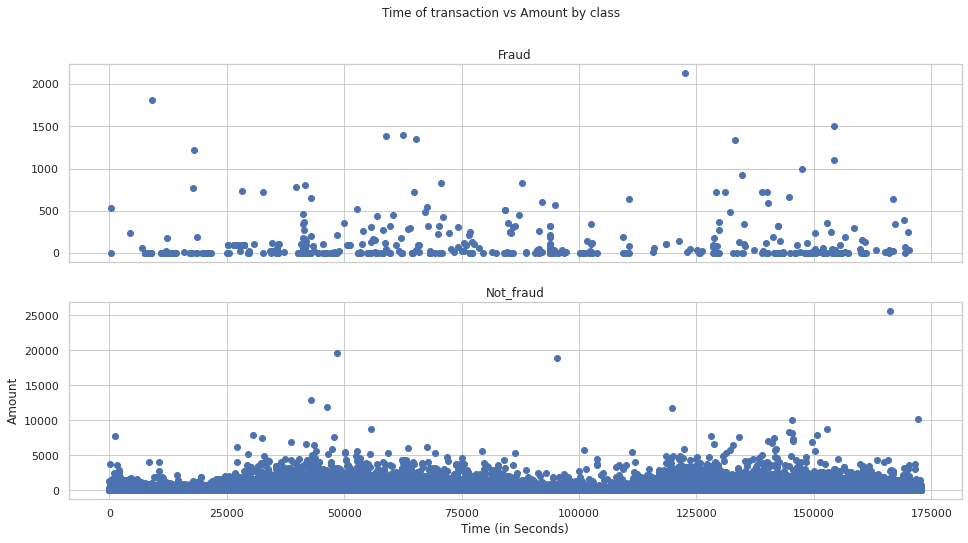

In [0]:
#on va découvrir si les transactions frauduleuses sont plus fréquentes pendant certaines périodes ou pas 
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(not_fraud.Time, not_fraud.Amount)
ax2.set_title('Not_fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Figure size 432x288 with 0 Axes>

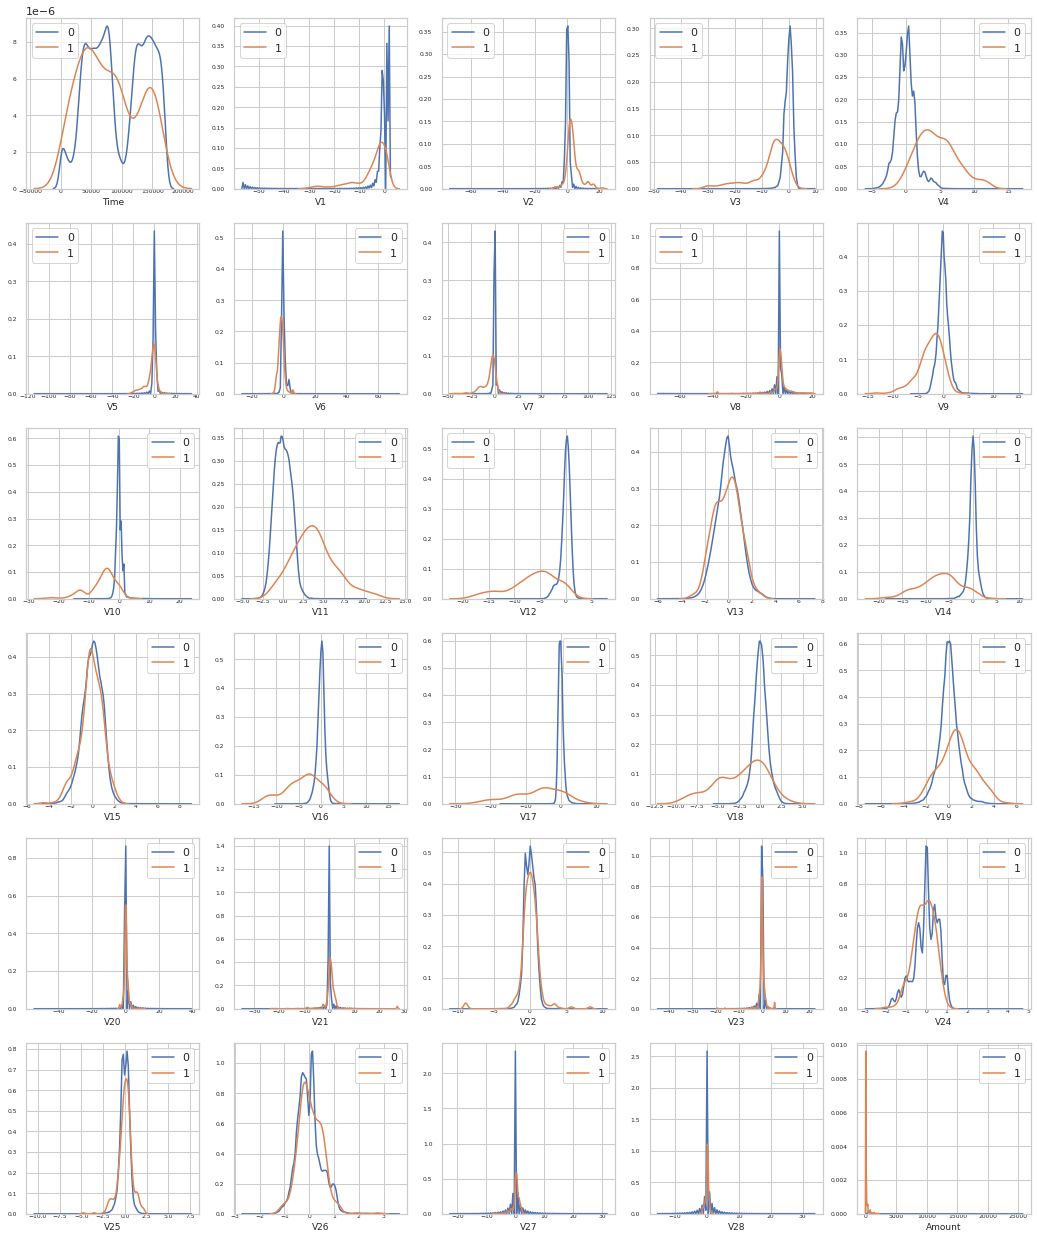

In [0]:
#Features distribution

def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,5,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,5,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
t0 = Df.loc[Df['Class'] == 0]
t1 = Df.loc[Df['Class'] == 1]
features = Df.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features)

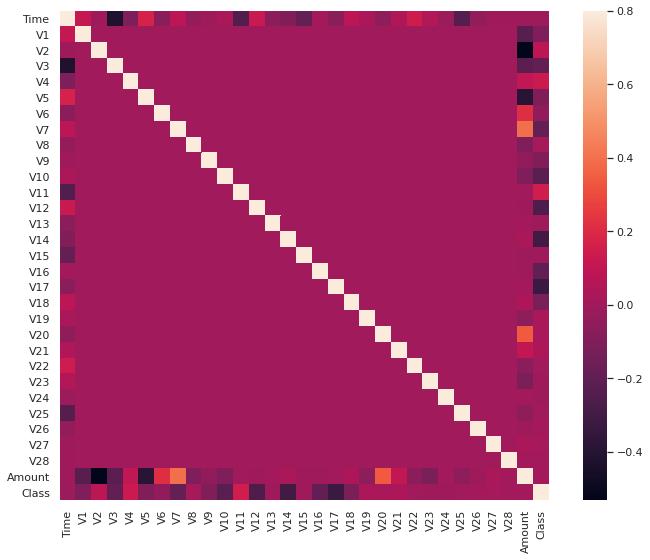

In [0]:
# carte thermique (heatmap) pour trouver les corrélations élevées

correlation_matrix = Df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

--> Les corrélations les plus élevées proviennent de :
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

Si ces corrélations sont élevées, je ne pense pas qu'il y ait un risque de multicollinéarité.

La matrice de corrélation montre également qu'aucune des composantes de l'ACP V1 à V28 n'a de corrélation entre elles ; cependant, si nous observons que la classe a une certaine forme de corrélations positives et négatives avec les composantes V, elle n'a aucune corrélation avec le temps et la quantité.



# ***Data Pre-processing***

In [0]:
# Time and Amount doit être mis à l'échelle comme les autres colonnes.

scalar = StandardScaler()

X = Df.drop('Class', axis=1)
y = Df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [0]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


# ***Model Building (Imbalanced Dataset)***

**Convolutional Neural Network (CNNs)**

In [0]:
# à l'aide de la Numpy.expand_dims()méthode, nous pouvons obtenir les dimensions étendues de nos features (axis=-1)
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_validate_d = np.expand_dims(X_validate, -1)

In [0]:
print(f"TRAINING: X_train: {X_train_d.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate_d.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test_d.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30, 1), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30, 1), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30, 1), y_test: (85443,)


In [0]:
# modéle

# on va appliquer un CNN 1D (unidimensionnel)
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
# instance de modéle
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [0]:
# on va compiler le modéle
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])

In [0]:
# modele fitting

# weights = {0:1, 1:5}model

m = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=500, 
              epochs=epochs, 
#             class_weight=weights
             )

Train on 159491 samples, validate on 39873 samples
Epoch 1/20
159491/159491 [==============================] - 84s 529us/step - loss: 0.0027 - auc_1: 0.9680 - val_loss: 0.0038 - val_auc_1: 0.9269
Epoch 2/20
159491/159491 [==============================] - 84s 527us/step - loss: 0.0026 - auc_1: 0.9593 - val_loss: 0.0039 - val_auc_1: 0.9198
Epoch 3/20
159491/159491 [==============================] - 84s 529us/step - loss: 0.0028 - auc_1: 0.9644 - val_loss: 0.0040 - val_auc_1: 0.9198
Epoch 4/20
159491/159491 [==============================] - 84s 528us/step - loss: 0.0029 - auc_1: 0.9627 - val_loss: 0.0039 - val_auc_1: 0.9268
Epoch 5/20
159491/159491 [==============================] - 84s 528us/step - loss: 0.0028 - auc_1: 0.9608 - val_loss: 0.0038 - val_auc_1: 0.9196
Epoch 6/20
159491/159491 [==============================] - 85s 531us/step - loss: 0.0028 - auc_1: 0.9627 - val_loss: 0.0039 - val_auc_1: 0.9196
Epoch 7/20
159491/159491 [==============================] - 85s 530us/step - lo

# ***Evaluation***

In [0]:
score = model.evaluate(X_test_d, y_test)

85443/85443 [==============================] - 17s 194us/step


In [0]:
print(score)

[0.0024055577335374903, 0.9554837346076965]


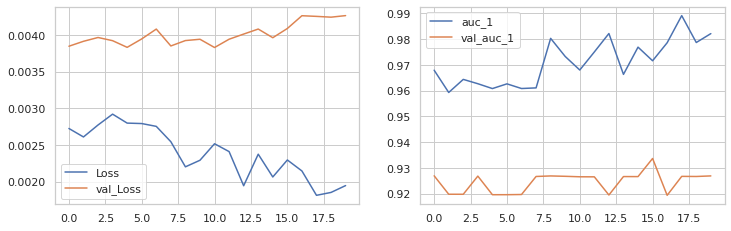

In [0]:
#Train Learning Curve : courbe d'apprentissage calculée à partir de traning dataset qui donne une idée 
#de la qualité d'apprentissage du modèle

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['auc_1'], label='auc_1')
plt.plot(m.history['val_auc_1'], label='val_auc_1')
plt.legend()

In [0]:
# Une fonction qui va nous permettre de mieux afficher la résultat de l'évaluation de notre modéle

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [0]:
#Predict train/test
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:	Precision Score: 98.44%
			Recall Score: 88.15%
			F1 score: 93.01%
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    34    253]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 88.10%
			Recall Score: 81.62%
			F1 score: 84.73%
_______________________________________________
Confusion Matrix: 
 [[85292    15]
 [   25   111]]



# ***Adding MaxPooling***

In [0]:
# modéle

#un pooling layer (une couche de regroupement) est souvent utilisée après une couche CNN afin de réduire 
#la complexité de la sortie et d'éviter le sur-ajustement (Overfitting) des données

epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))



In [0]:
#on va compiler le modéle

model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])


In [0]:
# modele fitting

# weights = {0:1, 1:5}
m = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 159491 samples, validate on 39873 samples
Epoch 1/10
159491/159491 [==============================] - 29s 184us/step - loss: 0.0456 - auc_3: 0.5787 - val_loss: 0.0130 - val_auc_3: 0.9442
Epoch 2/10
159491/159491 [==============================] - 29s 180us/step - loss: 0.0106 - auc_3: 0.8370 - val_loss: 0.0074 - val_auc_3: 0.9224
Epoch 3/10
159491/159491 [==============================] - 29s 179us/step - loss: 0.0080 - auc_3: 0.8840 - val_loss: 0.0064 - val_auc_3: 0.9227
Epoch 4/10
159491/159491 [==============================] - 29s 180us/step - loss: 0.0064 - auc_3: 0.8973 - val_loss: 0.0063 - val_auc_3: 0.9161
Epoch 5/10
159491/159491 [==============================] - 29s 179us/step - loss: 0.0060 - auc_3: 0.9029 - val_loss: 0.0054 - val_auc_3: 0.9243
Epoch 6/10
159491/159491 [==============================] - 29s 180us/step - loss: 0.0057 - auc_3: 0.9155 - val_loss: 0.0048 - val_auc_3: 0.9175
Epoch 7/10
159491/159491 [==============================] - 29s 183us/step - lo

# ***Evaluation***

In [0]:
score = model.evaluate(X_test_d, y_test)
print(score)

85443/85443 [==============================] - 5s 59us/step
[0.0033447634866491226, 0.9582895636558533]


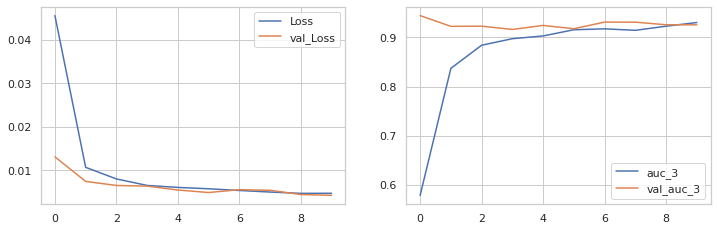

In [0]:
#Train Learning Curve : courbe d'apprentissage calculée à partir de traning dataset qui donne une idée 
#de la qualité d'apprentissage du modèle

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['auc_3'], label='auc_3')
plt.plot(m.history['val_auc_3'], label='val_auc_3')
plt.legend()

In [0]:
#Predict train/test
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:	Precision Score: 86.49%
			Recall Score: 78.05%
			F1 score: 82.05%
_______________________________________________
Confusion Matrix: 
 [[159169     35]
 [    63    224]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:	Precision Score: 79.14%
			Recall Score: 80.88%
			F1 score: 80.00%
_______________________________________________
Confusion Matrix: 
 [[85278    29]
 [   26   110]]



# ***Model Building (Downsampling the majority class)***

In [0]:
## Data Pre-processing

#Split into training and test datasets
X = Df.drop('Class', axis=1)
y = Df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concaténation de X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,0.330147,0.582071,0.112201,-0.215089,1.267783,-0.896319,-0.298897,-0.613436,-0.401911,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,0.905251,0.689143,-0.283648,1.074658,0.549725,-0.508424,0.072520,-0.904567,-0.884600,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,-2.114621,-3.022907,1.215878,0.137917,-2.456654,-1.297028,0.968448,2.063020,-0.464144,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,1.401227,0.405652,-0.751172,0.102870,0.771533,0.521996,-0.043959,-0.031356,-0.137183,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,1.093326,-2.530624,1.194529,1.573518,-0.486271,0.891702,-0.389181,0.479331,-0.470981,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0


In [0]:
# Dimension du dataFrame
df.shape

(199364, 31)

**Random Under-Sampling:**

In [0]:
#Dans cette phase du projet, nous allons mettre en œuvre le "Random Under Sampling" qui consiste essentiellement à supprimer des données 
#afin d'avoir un ensemble de données plus équilibré et d'éviter ainsi que nos modèles ne soient trop adaptés (overfitting).

from sklearn.utils import resample

minority_class = df[df.Class == 1]
majority_class = df[df.Class == 0]

#notre sous-échantillon sera un DataFrame avec un ratio de 50/50 des transactions frauduleuses et non frauduleuses. 
#Cela signifie que notre sous-échantillon aura le même nombre de transactions frauduleuses et non frauduleuses.

majority_downsample = resample(majority_class, replace=False, 
                               n_samples=minority_class.shape[0], 
                               random_state=42)

new_df = pd.concat([majority_downsample, minority_class])
new_df.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

In [0]:
#Dimension de new DataFrame
new_df.shape

(712, 31)

In [0]:
# Time and Amount doit être mis à l'échelle comme les autres colonnes.

scaler = StandardScaler()

X = new_df.drop('Class', axis=1)
y = new_df.Class

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [0]:
# à l'aide de la Numpy.expand_dims()méthode, nous pouvons obtenir les dimensions étendues de nos features (axis=-1)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_validate = np.expand_dims(X_validate, -1)

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(498, 30, 1)
(498,)
(214, 30, 1)
(214,)
(85443, 30, 1)
(85443,)


In [0]:
#modéle

epochs = 150
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))



In [0]:
# on va compiler le modéle

model.compile(optimizer=Adam(0.00001), loss='binary_crossentropy', metrics=["accuracy"])

In [0]:
 # modele fitting
 
 #weights = {0:1, 1:5}

m = model.fit(X_train, y_train, 
              validation_data=(X_validate, y_validate),
              batch_size=50, 
              epochs=epochs, 
#              class_weight=weights
             )

Train on 498 samples, validate on 214 samples
Epoch 1/150
498/498 [==============================] - 1s 2ms/step - loss: 1.0878 - accuracy: 0.5462 - val_loss: 0.6905 - val_accuracy: 0.4393
Epoch 2/150
498/498 [==============================] - 0s 999us/step - loss: 0.9040 - accuracy: 0.6064 - val_loss: 0.6829 - val_accuracy: 0.4626
Epoch 3/150
498/498 [==============================] - 0s 990us/step - loss: 0.6870 - accuracy: 0.6727 - val_loss: 0.6698 - val_accuracy: 0.6402
Epoch 4/150
498/498 [==============================] - 1s 1ms/step - loss: 0.6199 - accuracy: 0.7088 - val_loss: 0.6554 - val_accuracy: 0.8318
Epoch 5/150
498/498 [==============================] - 0s 991us/step - loss: 0.6519 - accuracy: 0.7329 - val_loss: 0.6411 - val_accuracy: 0.8551
Epoch 6/150
498/498 [==============================] - 1s 1ms/step - loss: 0.5428 - accuracy: 0.7450 - val_loss: 0.6266 - val_accuracy: 0.8318
Epoch 7/150
498/498 [==============================] - 0s 988us/step - loss: 0.4481 - accu

# ***Evaluation***

In [0]:
score = model.evaluate(X_test, y_test)

print(score)

85443/85443 [==============================] - 16s 186us/step
[0.07384891198731357, 0.9815081357955933]


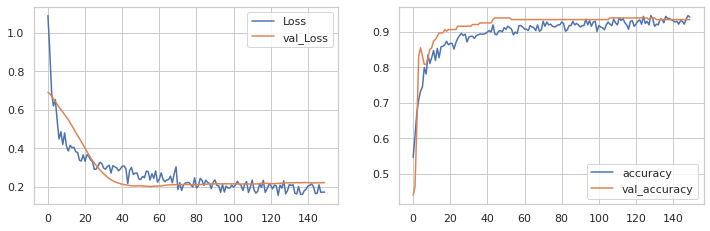

In [0]:
#Train Learning Curve : courbe d'apprentissage calculée à partir de traning dataset qui donne une idée 
#de la qualité d'apprentissage du modèle

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['accuracy'], label='accuracy')
plt.plot(m.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [0]:
# Predict train/test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 94.78%
_______________________________________________
Classification Report:	Precision Score: 99.16%
			Recall Score: 90.80%
			F1 score: 94.80%
_______________________________________________
Confusion Matrix: 
 [[235   2]
 [ 24 237]]

Test Result:
Accuracy Score: 98.15%
_______________________________________________
Classification Report:	Precision Score: 7.33%
			Recall Score: 91.18%
			F1 score: 13.57%
_______________________________________________
Confusion Matrix: 
 [[83739  1568]
 [   12   124]]

